### Boston Housing Assignment

#### import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

#### Load Dataset

In [3]:
test_data=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Regression/Prac3/test.csv')
train_data=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Regression/Prac3/train.csv')

In [4]:
test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [5]:
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
train_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
test_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

#### Exploratory data analysis

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [10]:
train_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [11]:
test_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [12]:
test_data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [13]:
train_data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

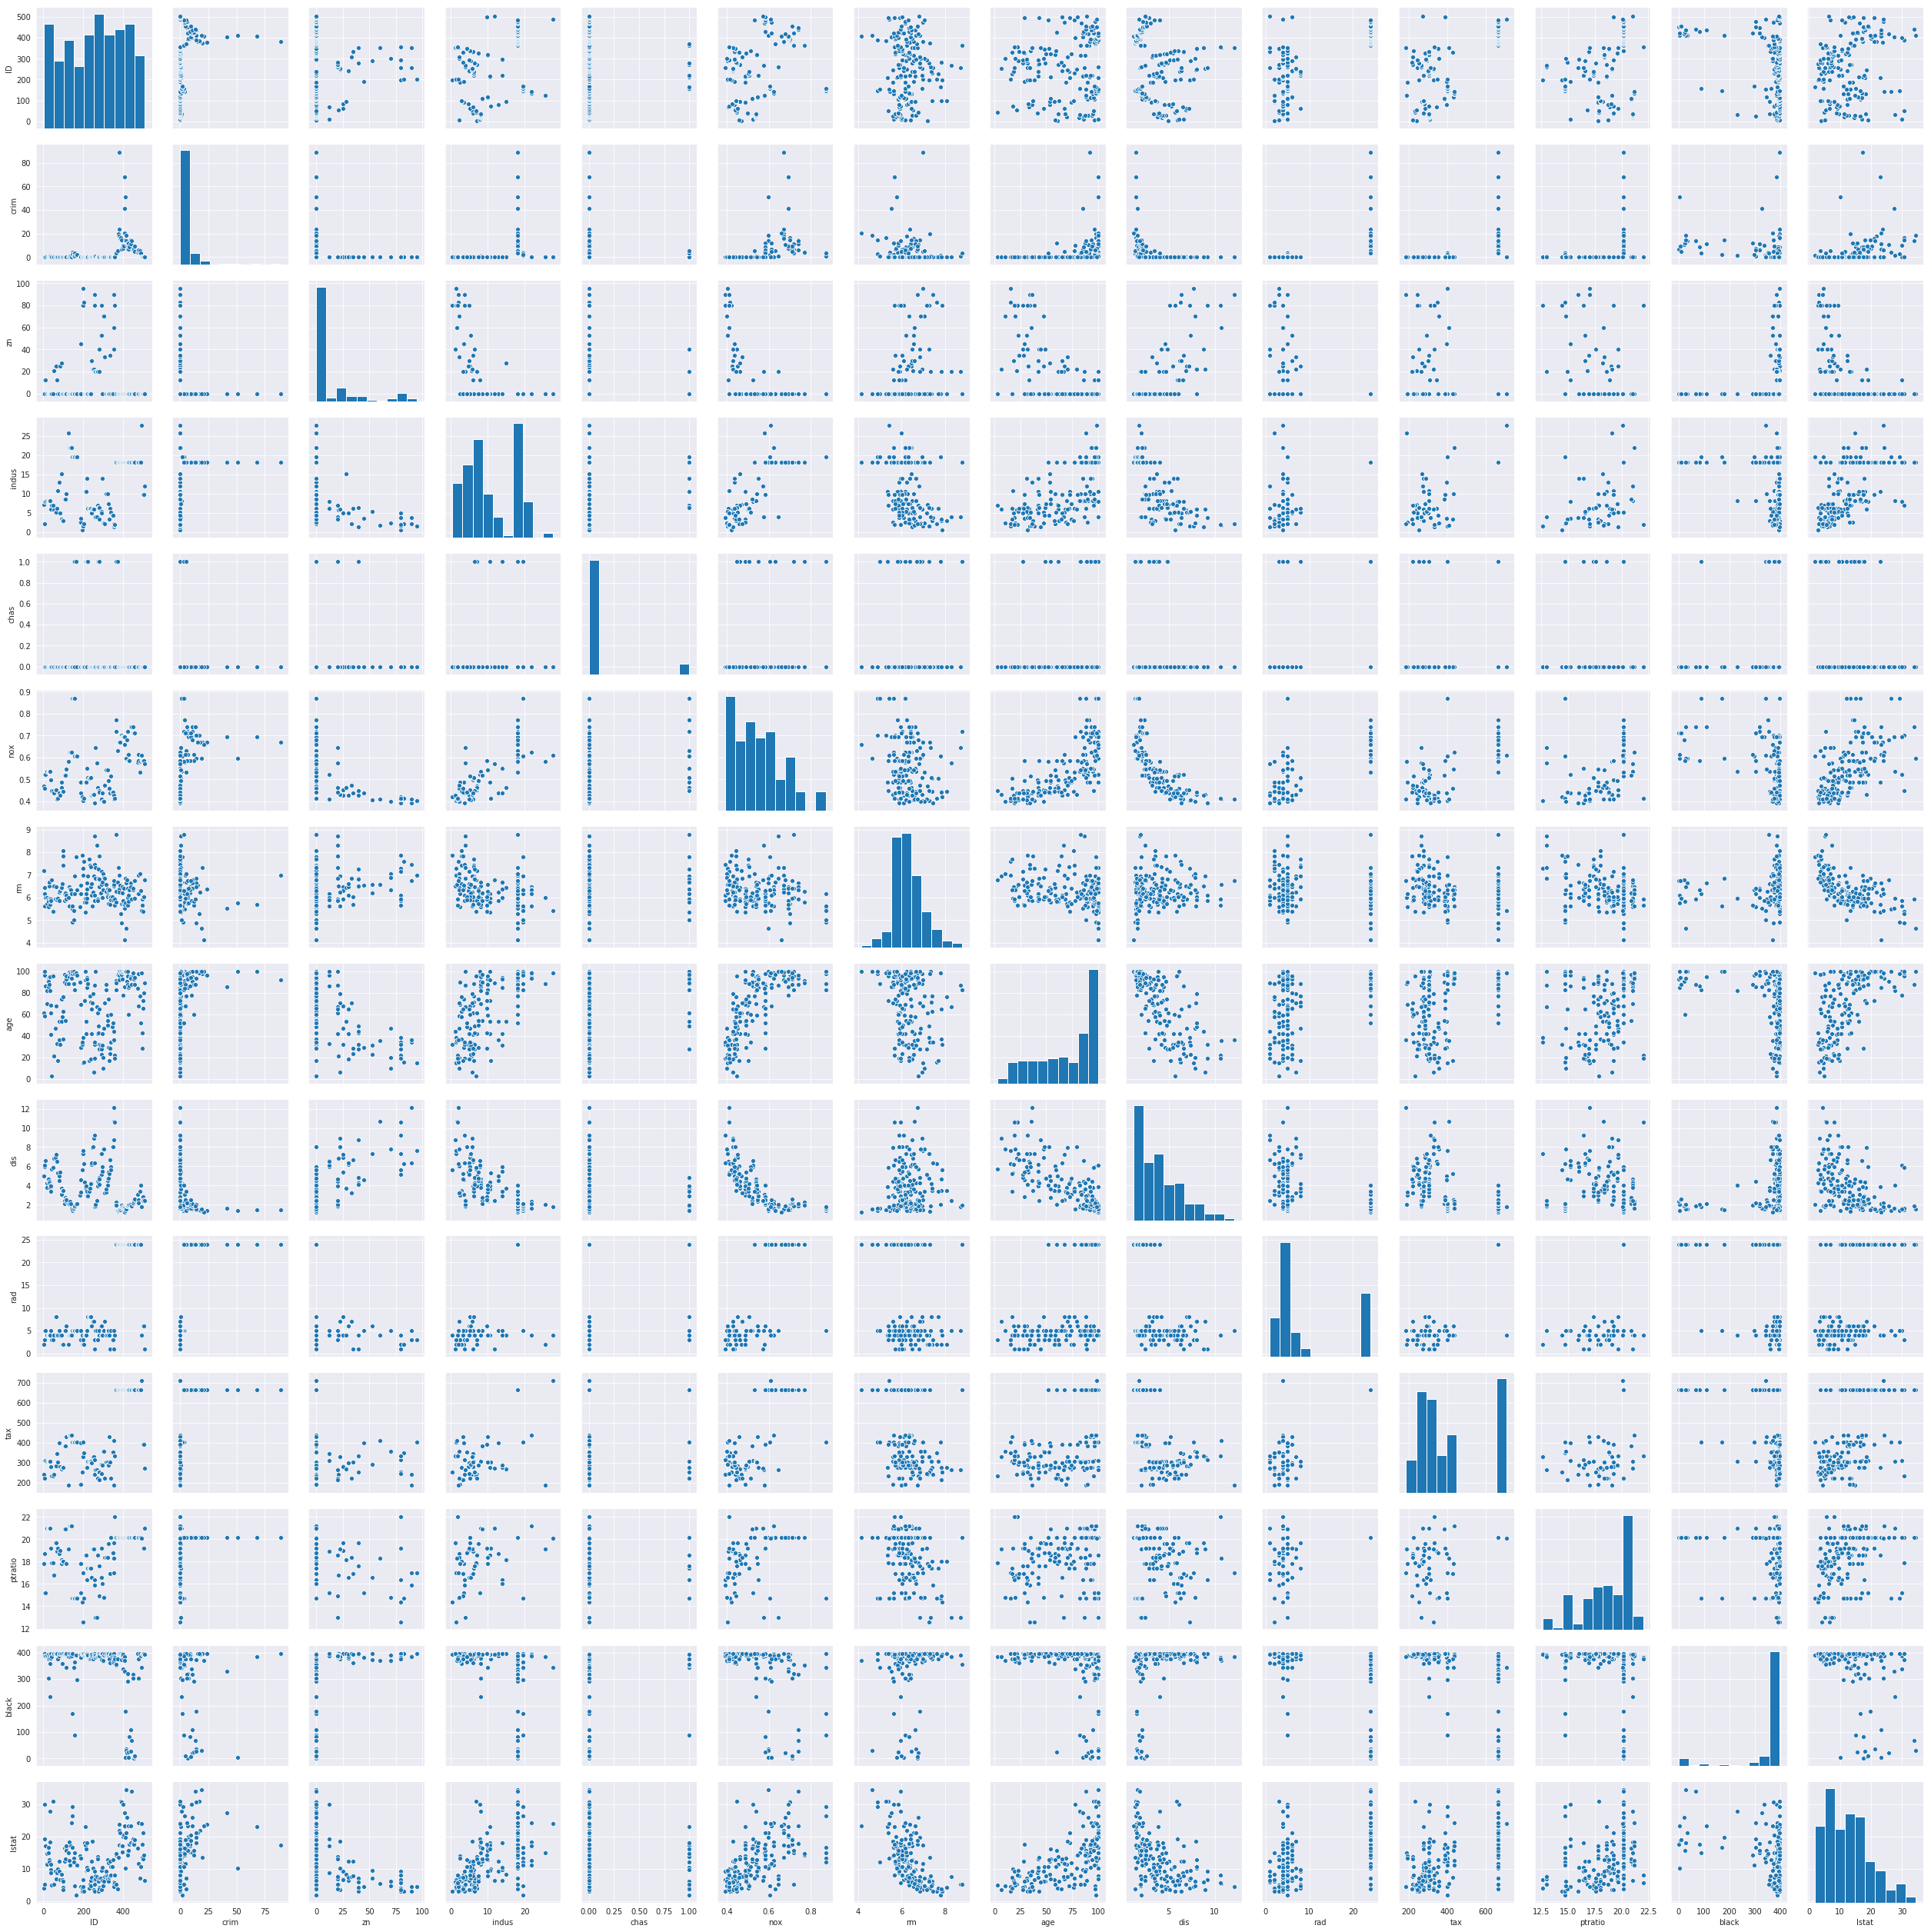

In [14]:
sns.pairplot(test_data)

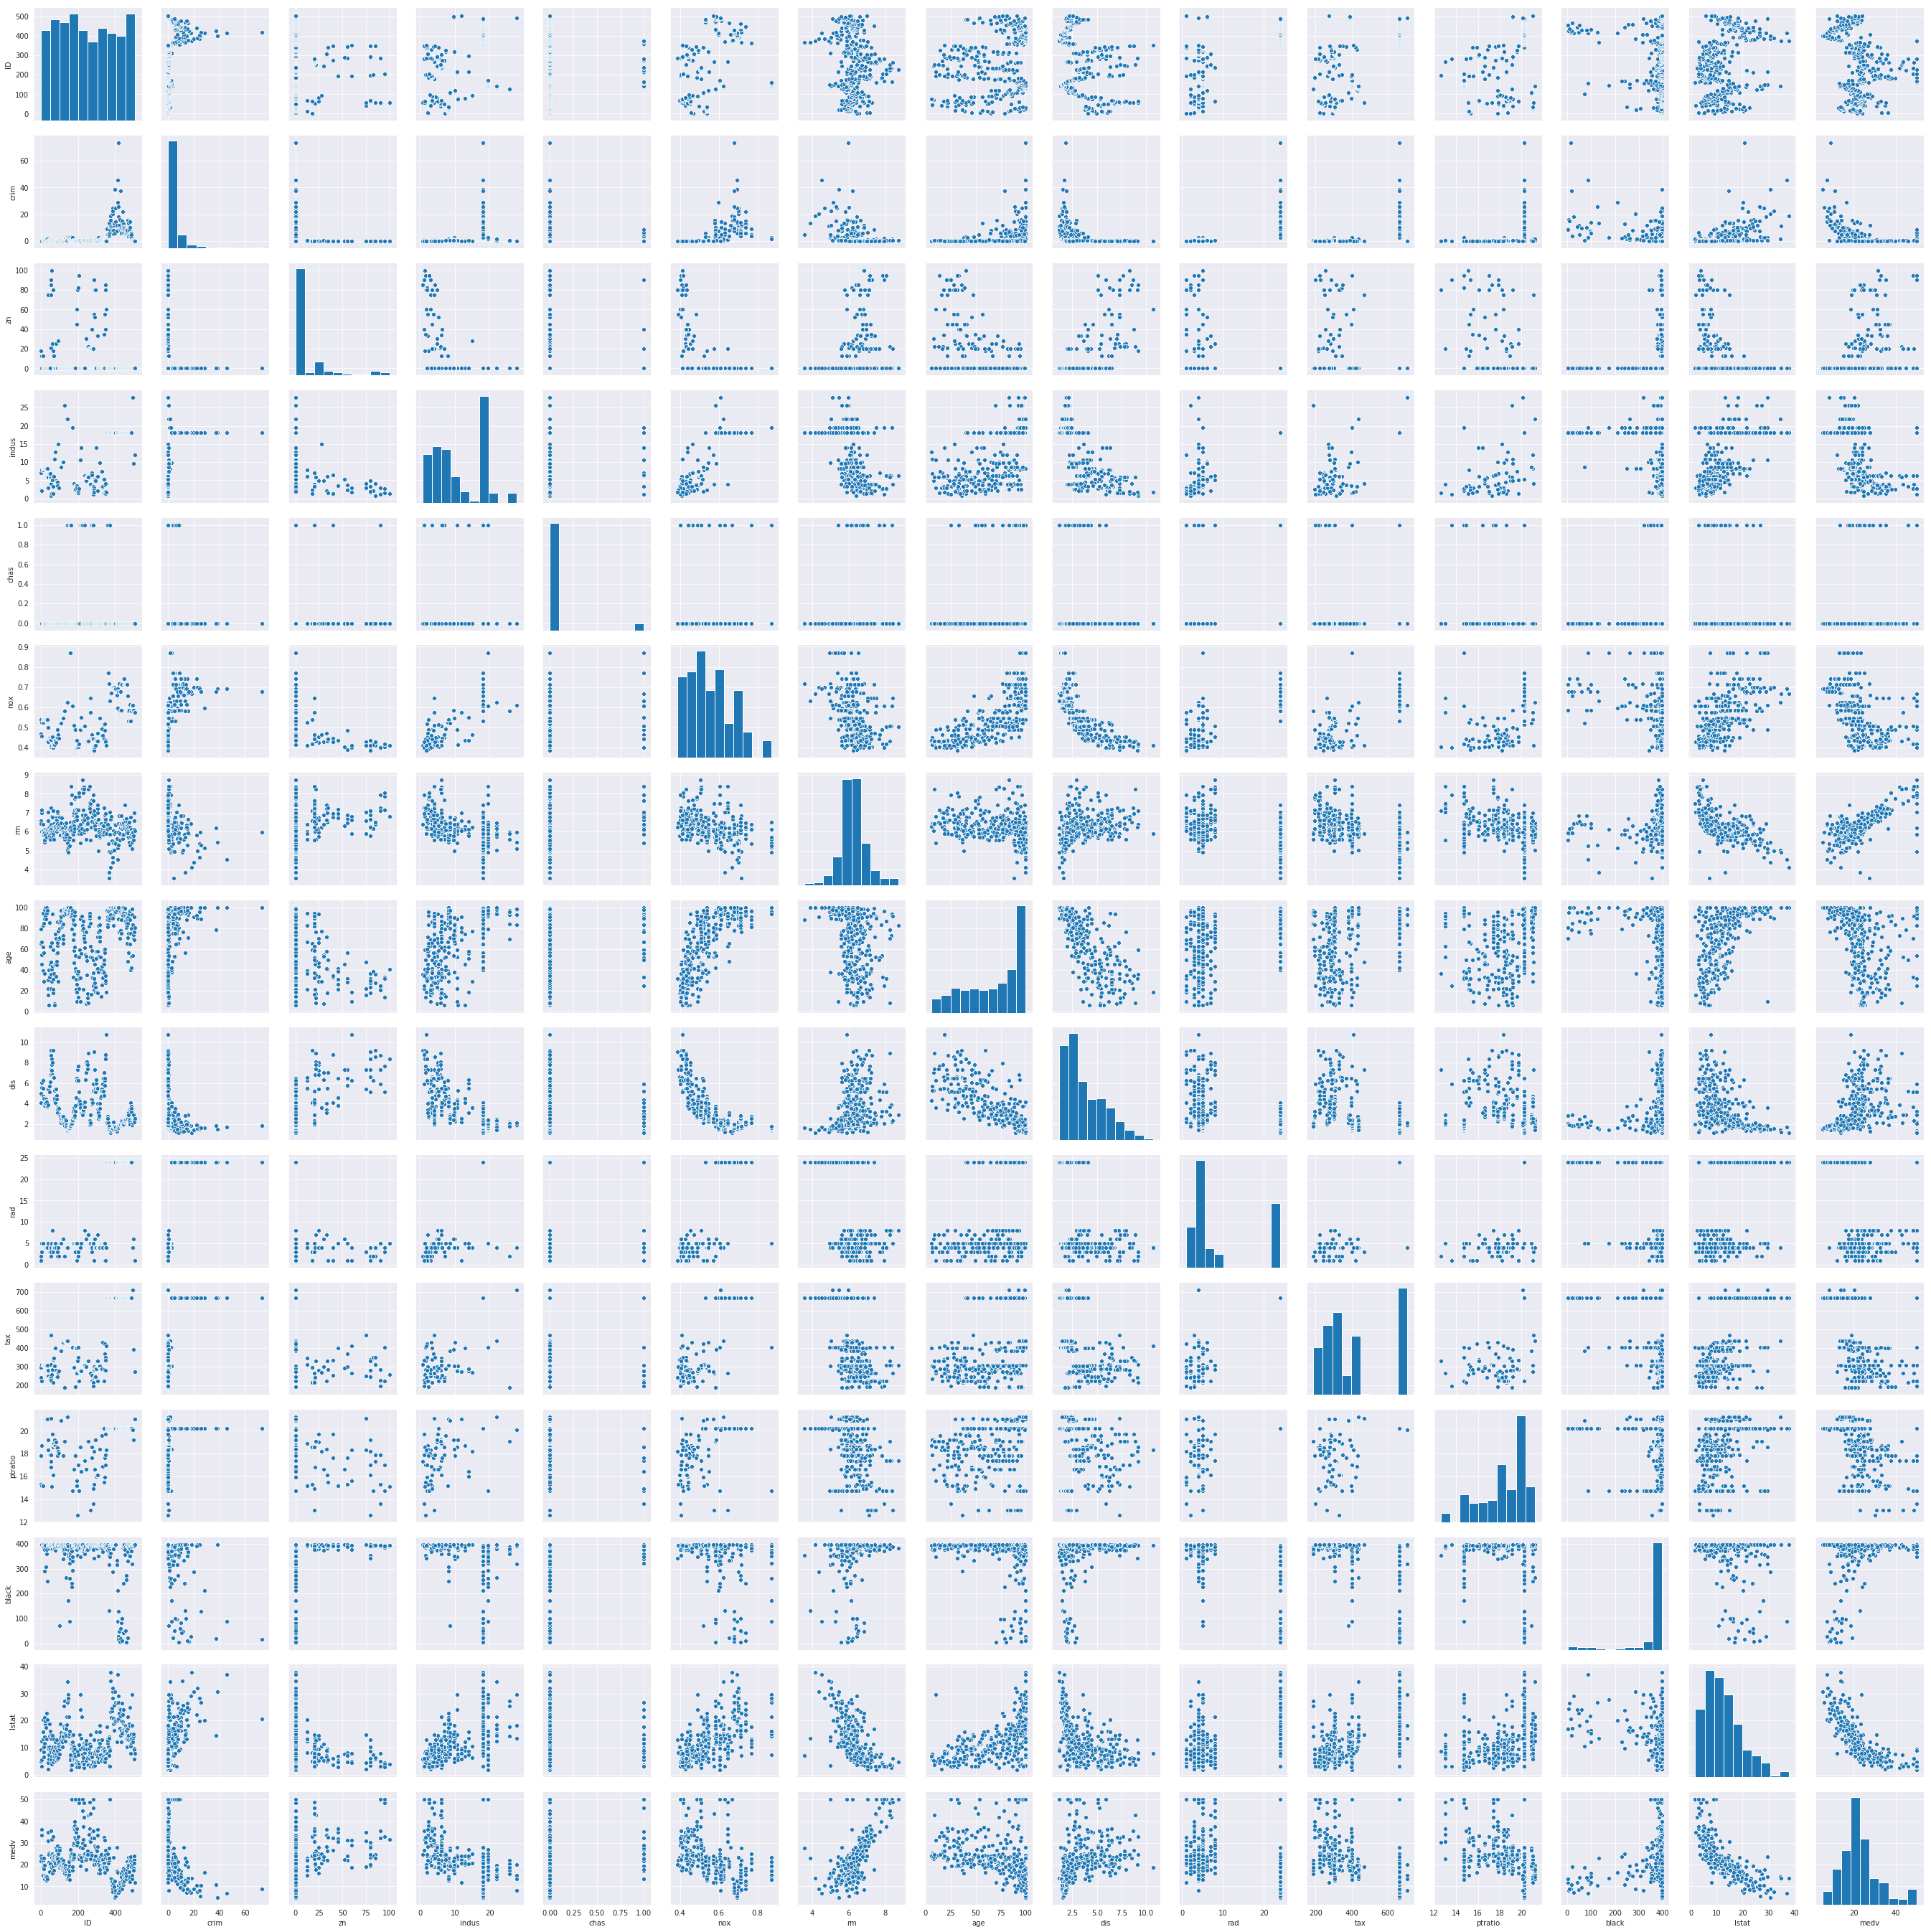

In [15]:
sns.pairplot(train_data)

In [101]:
train_data.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


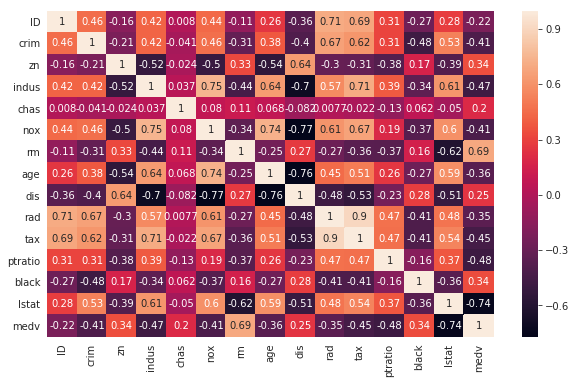

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True)

#### Regression model

In [21]:
X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,13].values
X_test=test_data.values

In [22]:
X_test.reshape(-1,1)

array([[3.0000e+00],
       [2.7290e-02],
       [0.0000e+00],
       ...,
       [2.1000e+01],
       [3.9345e+02],
       [6.4800e+00]])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression()

In [25]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred=regressor.predict(X_train)

In [27]:
regressor.coef_

array([-7.64839148e-17,  3.12250226e-16,  2.02946384e-15,  4.71356894e-16,
       -1.05113067e-15, -7.66328664e-15,  3.80964418e-15,  1.80519662e-15,
        2.62295611e-16,  1.99926881e-16,  3.81639165e-17,  1.44131126e-16,
        4.33247188e-16,  1.00000000e+00])

In [28]:
regressor.intercept_

-3.3573144264664734e-13

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_pred,y_train)

3.2202215678108417e-27

In [31]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_pred, y_train))))

RMSE: 5.6746996112665224e-14


In [16]:
from sklearn.linear_model import RANSACRegressor

In [17]:
reg=RANSACRegressor()

In [42]:
reg.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [43]:
y_pred1=reg.predict(X)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_pred1,y)

3.254190558006609e-27

#### statmodels

In [33]:
import statsmodels.api as sm

In [39]:
X_constant=sm.add_constant(X_train)

In [44]:
model=sm.OLS(y_train,X_constant)
lr=model.fit()


In [45]:
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.109e+30
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:29:59   Log-Likelihood:                 9875.5
No. Observations:                 333   AIC:                        -1.972e+04
Df Residuals:                     318   BIC:                        -1.966e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.51e-14   4.26e-14     -0.355      0.723   -9.89e-14    6.87e-14
x1          1.305e-16    1.8e-17      7.251      0.000    9.51e-17    1.66e-16
x2                  0   3.64e-16          0      1.000   -7.16e-16    7.16e-16
x3         -5.482e-16   1.15e-16     -4.784      0.000   -7.74e-16   -3.23e-16
x4         -6.939e-16   5.02e-16     -1.383      0.168   -1.68e-15    2.93e-16
x5          8.882e-16   7.77e-15      0.114      0.909   -1.44e-14    1.62e-14
x6         -3.553e-15   3.28e-14     -0.108      0.914   -6.82e-14    6.11e-14
x7          2.082e-15   3.54e-15      0.588      0.557   -4.89e-15    9.05e-15
x8         -2.732e-16   1.16e-16     -2.360      0.019   -5.01e-16   -4.55e-17
x9         -3.331e-16    1.8e-15     -0.185      0.853   -3.87e-15    3.21e-15
x10         1.735e-16   5.68e-16      0.305      0.760   -9.45e-16    1.29e-15
x11        -3.361e-17    3.1e-17     -1.083      0.279   -9.46e-17    2.74e-17
x12         2.498e-16   1.12e-15      0.223      0.823   -1.95e-15    2.45e-15
x13         8.928e-17   2.43e-17      3.670      0.000    4.14e-17    1.37e-16
x14            1.0000   4.32e-16   2.32e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        4.674   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.428
Skew:                           0.108   Prob(JB):                        0.180
Kurtosis:                       2.552   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_train,y_pred))))

RMSE:5.6746996112665224e-14
